# ***MOVIE RATING PREDICTION WITH PYTHON***

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Display the movie dataset file**

In [2]:
file = pd.read_csv("movie-dataset.csv", encoding='latin1')
print(file.head(10))

                                 Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
2                         #Homecoming -2021.0   90 min   
3                             #Yaaram -2019.0  110 min   
4                   ...And Once Again -2010.0  105 min   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                           ...Yahaan -2005.0  142 min   
7                      .in for Motion -2008.0   59 min   
8                  ?: A Question Mark -2012.0   82 min   
9                            @Andheri -2014.0  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Dra

In [3]:
#display the files row and column
file.shape

(15509, 10)

In [4]:
#display the column name about the dataset
file.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [5]:
file.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [7]:
#Find the null value in each column
file.isnull().mean()*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

<Axes: >

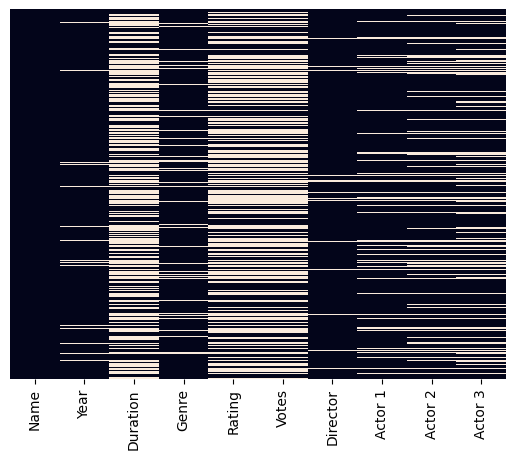

In [8]:
sns.heatmap(file.isnull(), yticklabels=False, cbar=False)

**Handling the Missing Values**

In [9]:
file.dropna(inplace=True)

In [10]:
file['Votes'] = file['Votes'].str.replace(',','',regex=True).astype(int)

In [11]:
file.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [12]:
file.shape

(5659, 10)

In [13]:
file.drop_duplicates(inplace=True)

<Axes: >

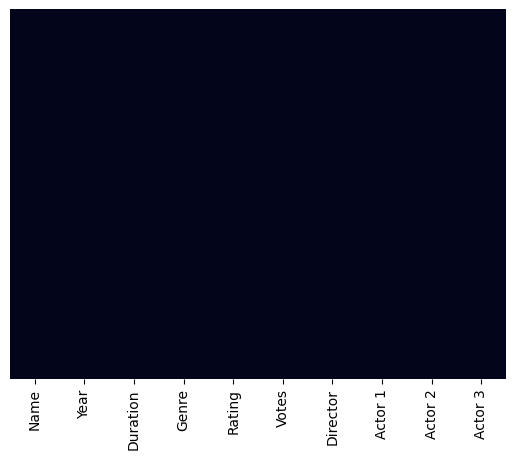

In [14]:
#This heatmap indicate all the empty values are removed
sns.heatmap(file.isnull(), yticklabels=False, cbar=False)

In [15]:
print(file.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [16]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 486.3+ KB


In [17]:
file.describe()

,Year,Rating,Votes
count,5659.000000,5659.000000,5659.000000
mean,-1996.247570,5.898533,2697.649585
std,19.741839,1.381165,13651.503584
min,-2021.000000,1.100000,5.000000
25%,-2013.000000,5.000000,30.000000
50%,-2002.000000,6.100000,131.000000
75%,-1983.000000,6.900000,922.500000
max,-1931.000000,10.000000,591417.000000


# **Data Visualization**

**Rating vs Votes**

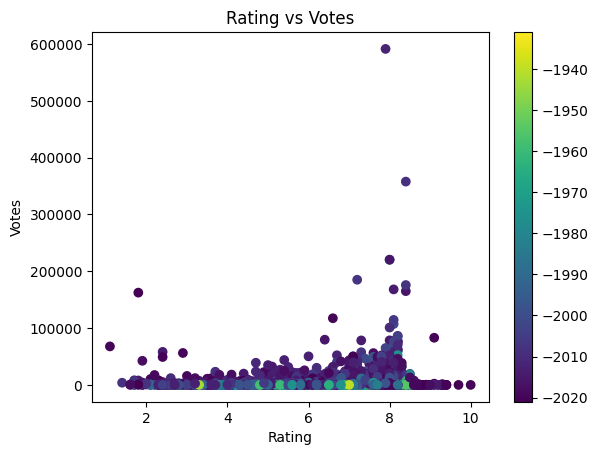

In [18]:
plt.scatter(file['Rating'], file['Votes'], c=file['Year'])
plt.title('Rating vs Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.colorbar()
plt.show()

**Movie Rating**

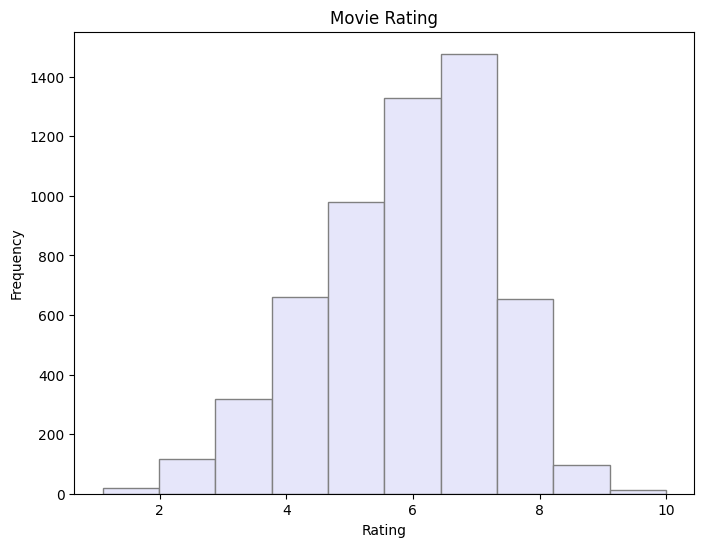

In [19]:
plt.figure(figsize=(8,6))
plt.hist(file['Rating'],color='lavender', edgecolor='grey')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Movie Rating')
plt.show()

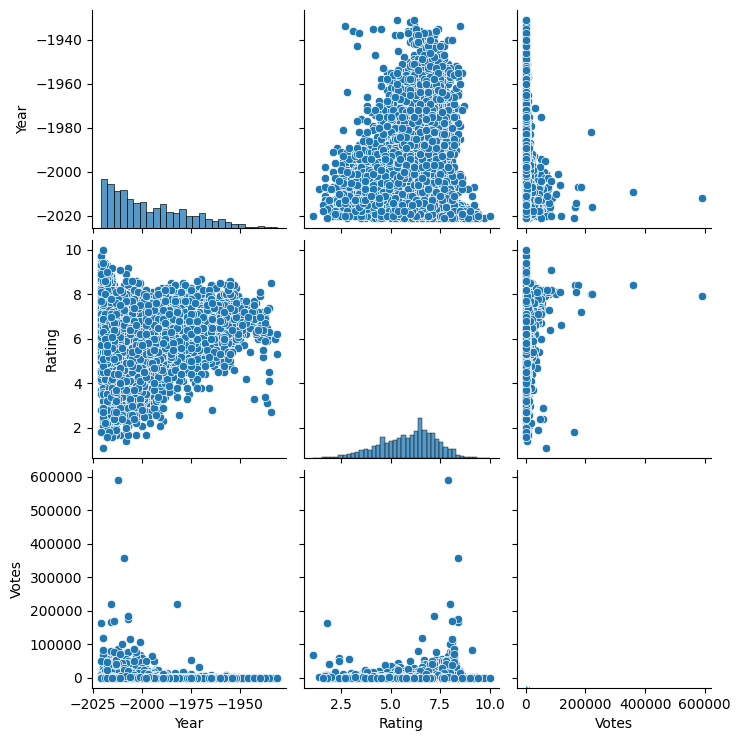

In [20]:
sns.pairplot(file)
plt.grid(False)
plt.show()

**Correlation Heatmap**

<ipython-input-21-892d0bb4a04f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = file[['Rating' , 'Year' , 'Duration' , 'Votes']].corr()


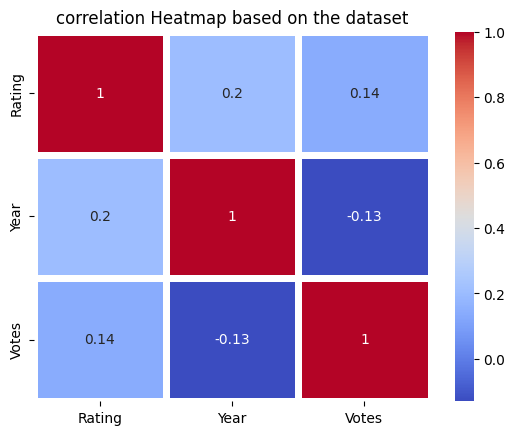

In [21]:
correlation_matrix = file[['Rating' , 'Year' , 'Duration' , 'Votes']].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' , linewidths=5)
plt.title("correlation Heatmap based on the dataset")
plt.show()

## Couting the Number of movies in each Year

In [22]:
y_count = file['Year'].value_counts().reset_index()
y_count.columns = ['Year' , 'Count']
y_count

,Year,Count
0,-2019.0,227
1,-2017.0,211
2,-2018.0,202
3,-2015.0,177
4,-2016.0,173
...,...,...
86,-1931.0,2
87,-1939.0,2
88,-1934.0,2
89,-1933.0,1


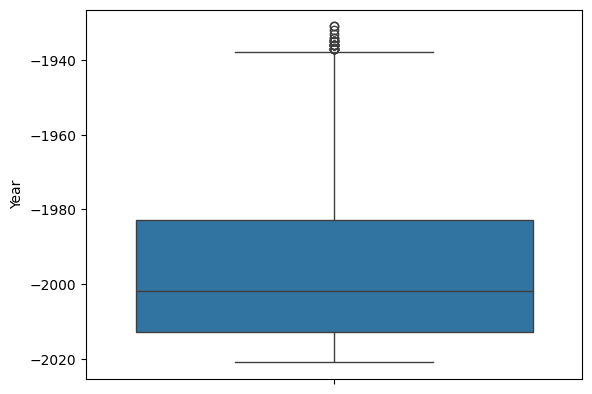

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [23]:
sns.boxplot(y=file['Year'])
plt.show()
plt.figure(figsize=(12, 12))

# **Model Training**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [25]:
c_features = ['Genre' , 'Director' , 'Actor 1' , 'Actor 2' , 'Actor 3']
for feature in c_features:
  le = LabelEncoder()
  file[feature] = le.fit_transform(file[feature])

**Defining Target Variables**

In [26]:
X = file[['Genre' , 'Director', 'Actor 1' , 'Actor 2' , 'Actor 3']]
Y = file['Rating']

In [27]:
print(X)
print(Y)

       Genre  Director  Actor 1  Actor 2  Actor 3
1        229       629     1352     2272      319
3        184      1335     1198      719     2148
5        157      1530      378       75     2045
6        289      2044      692     1112     2524
8        320       135     1934     1175     1013
...      ...       ...      ...      ...      ...
15493    229      1223     1861     1801     1615
15494    133      2059      763     1619     1184
15503     28      1793      406      754     1685
15505     38      1025      112     2164      314
15508     38       895      468      753      303

[5659 rows x 5 columns]
1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


**Data Standardization**

In [28]:
sc_X = StandardScaler()

In [29]:
standardized_file = sc_X.fit_transform(X)

In [30]:
X = standardized_file
Y = file['Rating']

In [31]:
print(X)

[[ 0.52931791 -0.84886812  0.6816723   1.63359215 -1.32934107]
 [ 0.11341838  0.17933035  0.40902916 -0.69552904  1.21099562]
 [-0.13612133  0.46332284 -1.04270705 -1.66137196  1.06793675]
 ...
 [-1.32836665  0.84634861 -0.99313557 -0.64303758  0.56792515]
 [-1.23594453 -0.2721449  -1.51363611  1.47161849 -1.33628568]
 [-1.23594453 -0.46147323 -0.88337015 -0.64453734 -1.35156381]]


In [32]:
print(Y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


## **Splitting the Training and Testing Model**

In [33]:
X_train, X_test, Y_train ,Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

In [34]:
print("X's shape : ",X.shape)
print("X's train shape : ",X_train.shape)
print("X's test shape : ",X_test.shape)

X's shape :  (5659, 5)
X's train shape :  (4527, 5)
X's test shape :  (1132, 5)


# **Model Building**

### To implement a Random forest regression

In [35]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# **Model Evaluation**

### Accuracy of training data

In [36]:
X_train_prediction = regressor.predict(X_train)
mae = mean_absolute_error(X_train_prediction, Y_train)
print("Mean Absolute error for taining data:",mae)

Mean Absolute error for taining data: 0.3833603190381519


### Accuracy for Testing data

In [37]:
X_test_prediction = regressor.predict(X_test)
mae = mean_absolute_error(X_test_prediction, Y_test)
print("Mean Absolute error for testing data:",mae)

Mean Absolute error for testing data: 1.0890185323069157
